In [85]:
#import the libriys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ACC_SC  
from sklearn.metrics import classification_report as CLA_RE  
from sklearn.naive_bayes import ComplementNB as CNB  
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Task1

In [86]:
#read the data file
df = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')

In [87]:
#give the type of the data
type(df)

pandas.core.frame.DataFrame

In [88]:
#print the first 5 col
df.head().T

,0,1,2,3,4
Timestamp,8/27/2022 19:29:02,8/27/2022 19:57:31,8/27/2022 21:28:18,8/27/2022 21:40:40,8/27/2022 21:54:47
Age,18.0,63.0,18.0,61.0,18.0
Primary streaming service,Spotify,Pandora,Spotify,YouTube Music,Spotify
Hours per day,3.0,1.5,4.0,2.5,4.0
While working,Yes,Yes,No,Yes,Yes
Instrumentalist,Yes,No,No,No,No
Composer,Yes,No,No,Yes,No
Fav genre,Latin,Rock,Video game music,Jazz,R&B
Exploratory,Yes,Yes,No,Yes,Yes
Foreign languages,Yes,No,Yes,Yes,No


In [89]:
#print the shape 
df.shape

(736, 33)

In [90]:
#print information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [91]:
#give statical numbers for numircal data
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [92]:
#calculate the null 
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [93]:
#print the unique 
df.nunique()

Timestamp                       735
Age                              61
Primary streaming service         6
Hours per day                    27
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
BPM                             135
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Anxiety                     

In [94]:
#count the values of the target class
df['Music effects'].value_counts()

Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64

In [95]:
#i will copy the data so i won't change on the main data
data = df.copy()

In [96]:
#drop the null in the copy data 
data. dropna ( axis = 'index' , how = 'any' , inplace = True )

In [97]:
#change the target class into numircal
data['Music effects'] = data['Music effects'].map({'Improve':0,'No effect':1,'Worsen':2})

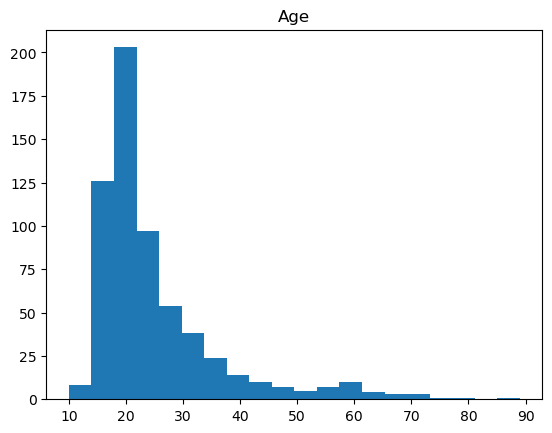

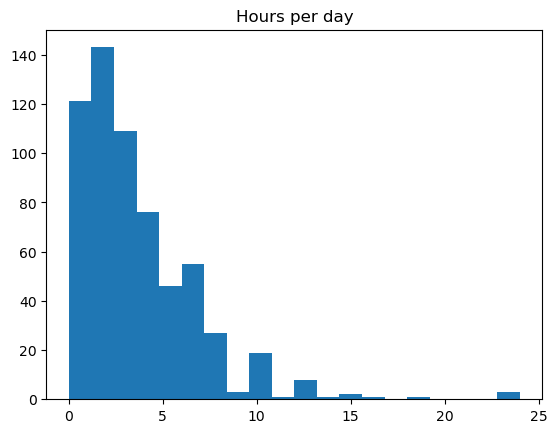

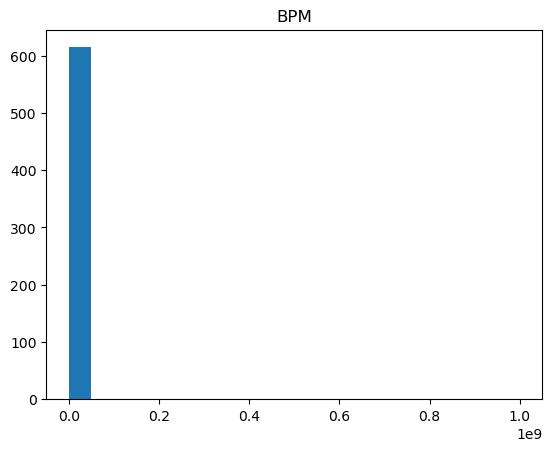

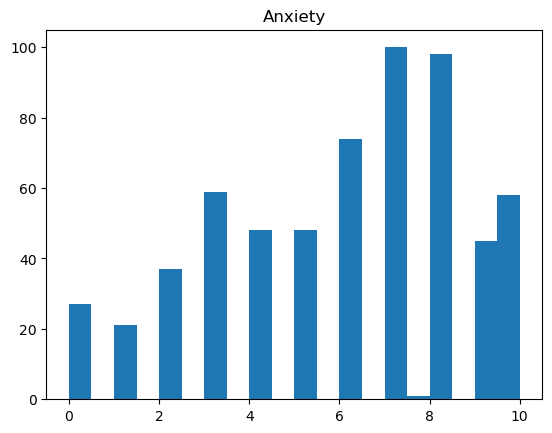

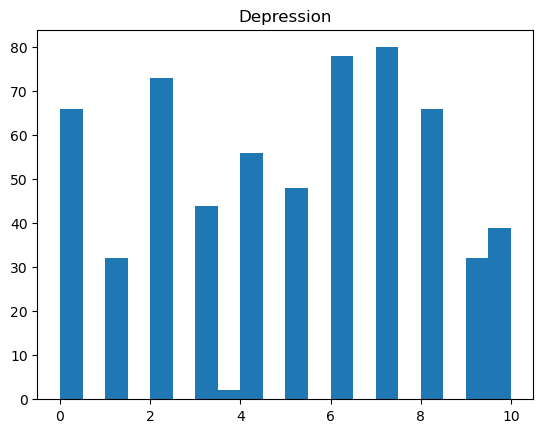

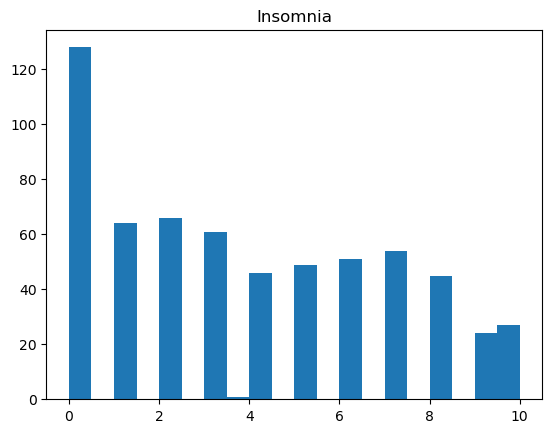

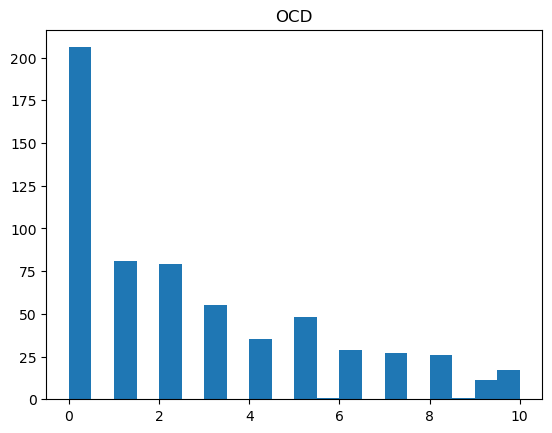

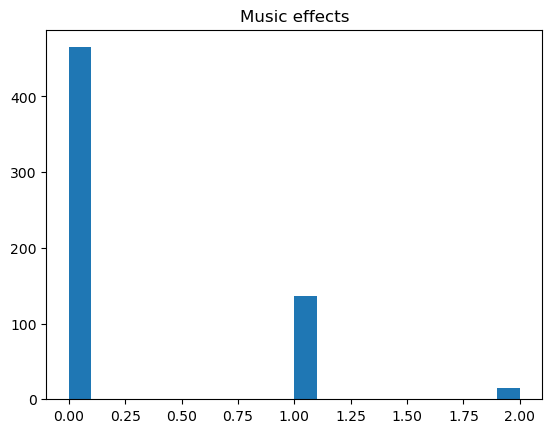

In [98]:
features = ['Age', 'Hours per day', 'BPM','Anxiety','Depression','Insomnia','OCD','Music effects']

# Plot histograms for each feature
for feature in features:
    plt.hist(data[feature] , bins=20)
    plt.title(feature)
    plt.show()

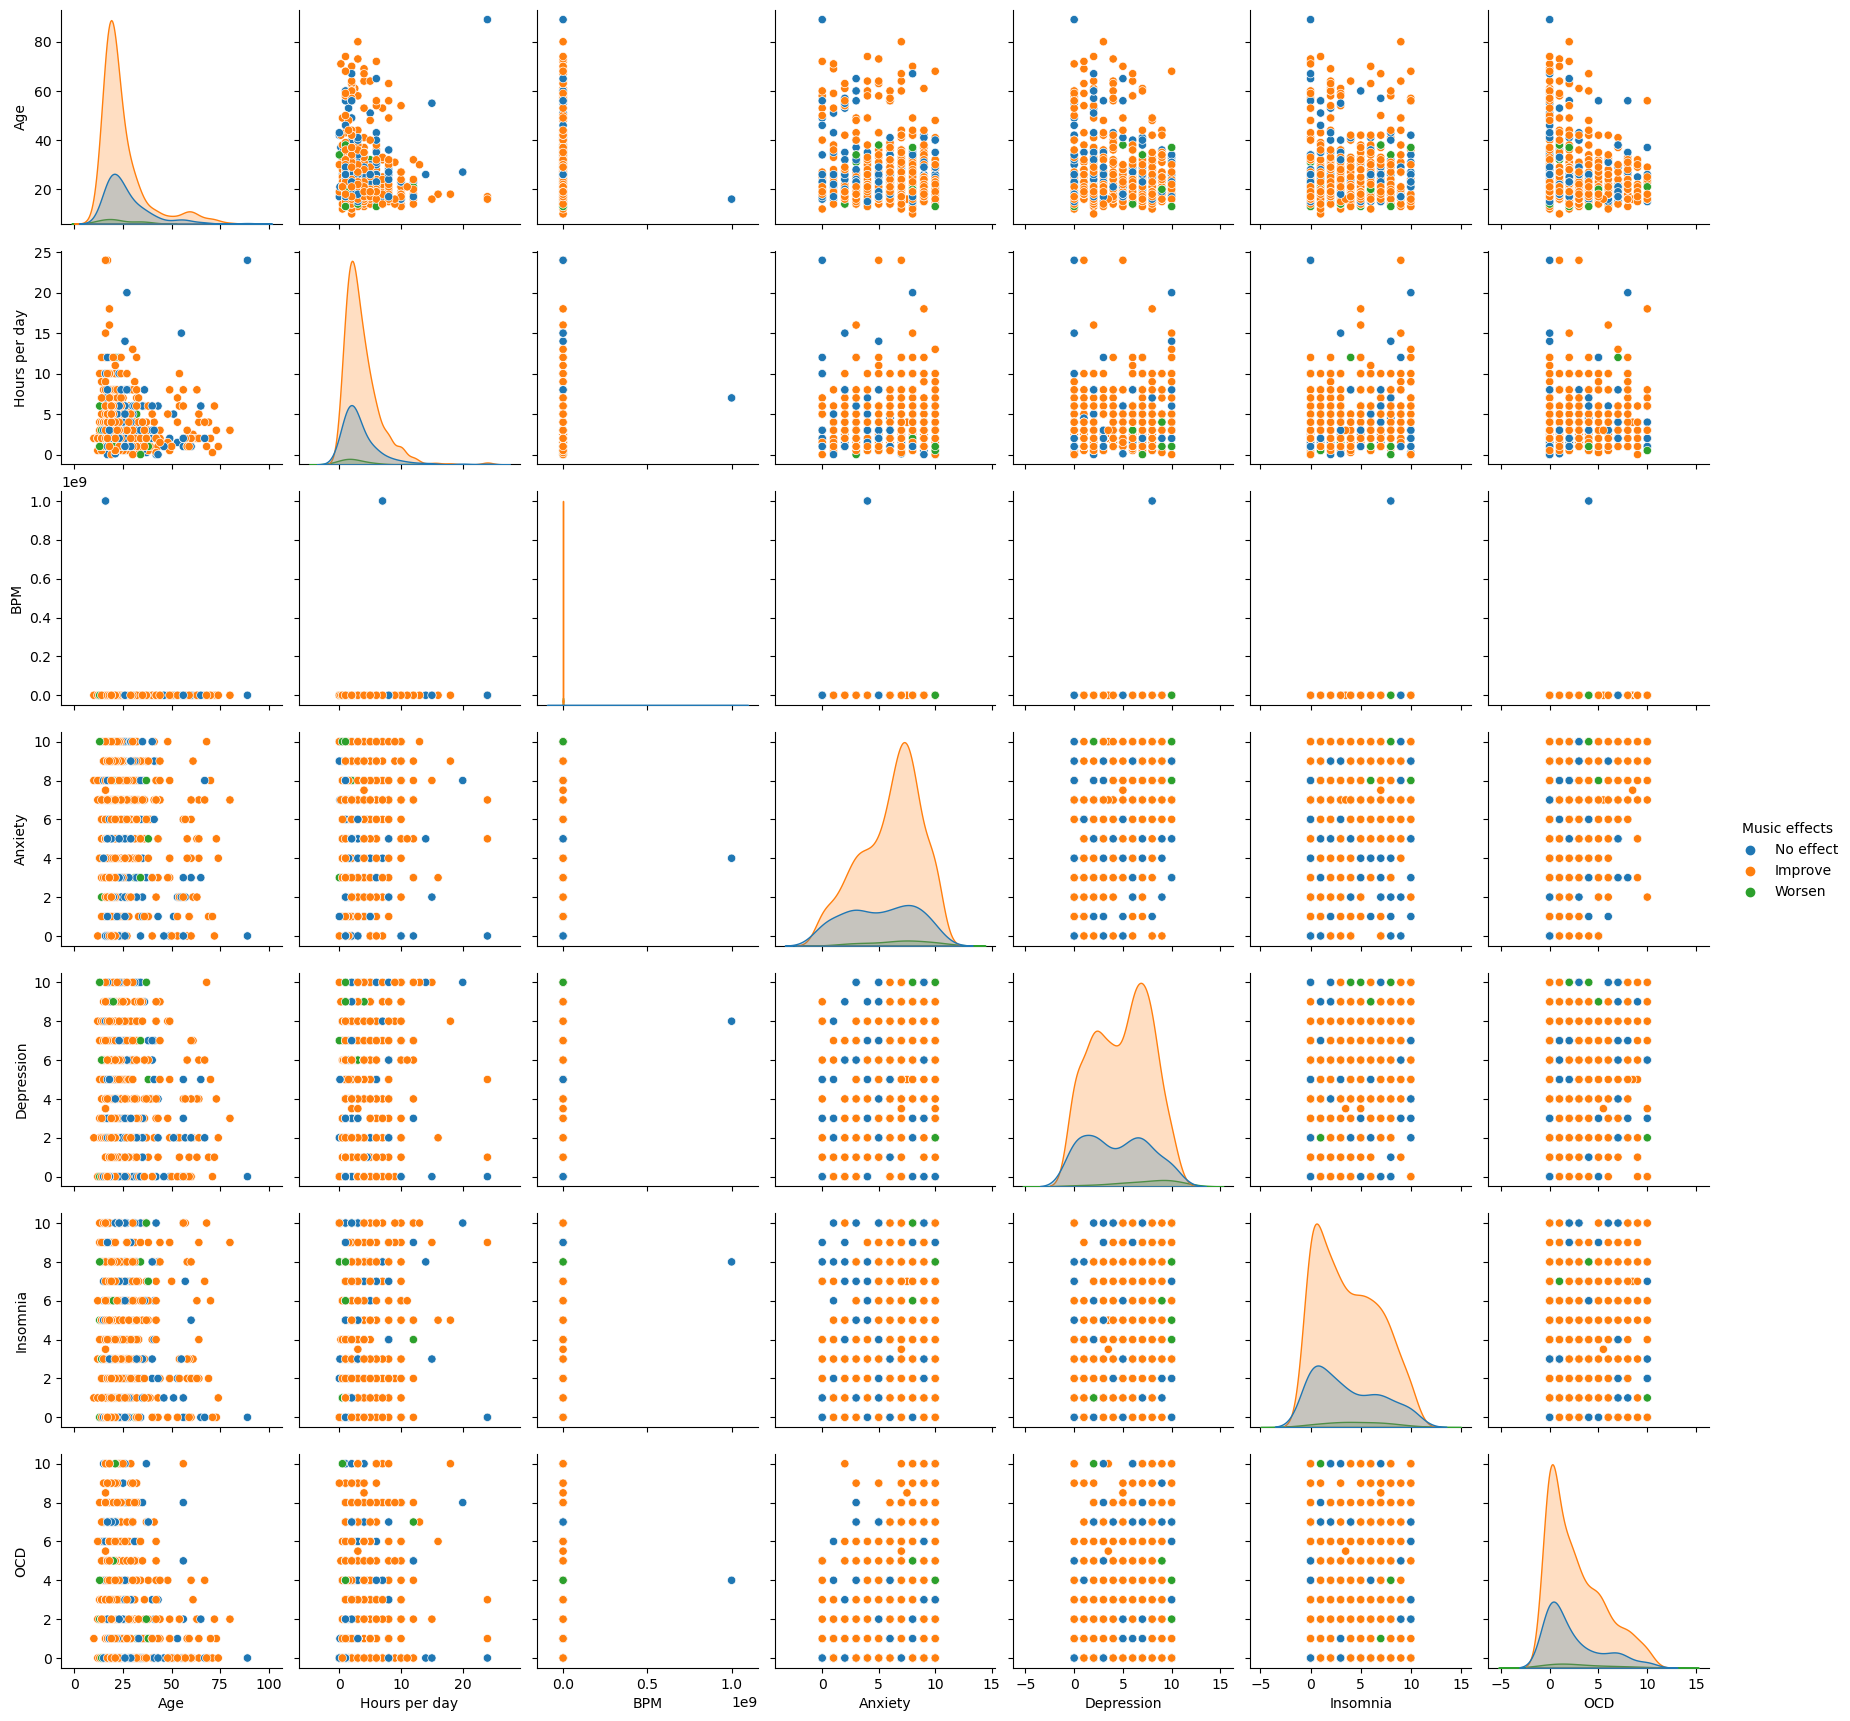

In [99]:
dfC=df.copy()
sns.pairplot(data=dfC, hue='Music effects')
plt.show()

In [100]:
#i will drop this columen because i want to change data values
data.drop(columns=['Timestamp'], inplace=True)

In [101]:
data = pd.get_dummies(data)

In [102]:
data.corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,...,Frequency [Rap]_Very frequently,Frequency [Rock]_Never,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Permissions_I understand.
Age,1.000000,-0.044917,-0.030435,-0.193781,-0.087390,0.007083,-0.140464,0.059195,-0.028900,0.154945,...,-0.143066,-0.104022,-0.031182,0.144253,-0.041864,0.281581,-0.072031,-0.140428,-0.102103,NaN
Hours per day,-0.044917,1.000000,0.043320,0.036945,0.085559,0.119036,0.108197,-0.041468,0.011536,-0.049371,...,0.183797,-0.070376,0.031044,-0.060235,0.081996,-0.049804,-0.014074,0.076822,-0.011808,NaN
BPM,-0.030435,0.043320,1.000000,-0.027564,0.041804,0.054452,0.018939,0.059445,-0.010908,-0.012752,...,0.083276,-0.015466,0.106687,-0.026215,-0.036450,-0.027135,-0.024997,0.068363,-0.017112,NaN
Anxiety,-0.193781,0.036945,-0.027564,1.000000,0.527950,0.275013,0.339262,-0.120924,0.100194,-0.035856,...,0.023396,0.019677,-0.090054,-0.049960,0.092537,-0.050504,-0.062678,0.066569,0.062098,NaN
Depression,-0.087390,0.085559,0.041804,0.527950,1.000000,0.372675,0.158990,0.009313,0.042854,-0.058609,...,0.040544,-0.143703,-0.093197,0.022900,0.137512,-0.078671,-0.022335,0.114897,-0.010672,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frequency [Video game music]_Never,0.281581,-0.049804,-0.027135,-0.050504,-0.078671,-0.042063,-0.007422,0.030128,0.054355,-0.017733,...,-0.022048,0.108768,-0.021195,0.038050,-0.093970,1.000000,-0.417144,-0.396925,-0.285559,NaN
Frequency [Video game music]_Rarely,-0.072031,-0.014074,-0.024997,-0.062678,-0.022335,-0.086266,-0.011688,-0.029856,0.004903,-0.044708,...,0.014058,0.033282,0.028773,-0.046014,0.000769,-0.417144,1.000000,-0.365644,-0.263055,NaN
Frequency [Video game music]_Sometimes,-0.140428,0.076822,0.068363,0.066569,0.114897,0.058006,0.014559,-0.073720,0.017059,-0.005866,...,-0.001888,-0.115290,-0.043467,0.022443,0.085772,-0.396925,-0.365644,1.000000,-0.250305,NaN
Frequency [Video game music]_Very frequently,-0.102103,-0.011808,-0.017112,0.062098,-0.010672,0.091020,0.006397,0.088083,-0.096878,0.085655,...,0.013191,-0.041250,0.044363,-0.019020,0.015704,-0.285559,-0.263055,-0.250305,1.000000,NaN


In [103]:
corr_matrix = data.corr()
print(corr_matrix['Music effects'].sort_values(ascending=False))

Music effects                 1.000000
While working_No              0.146556
Exploratory_No                0.144517
Fav genre_Video game music    0.143826
Frequency [Pop]_Rarely        0.104153
                                ...   
Frequency [R&B]_Sometimes    -0.096654
Anxiety                      -0.120924
Exploratory_Yes              -0.144517
While working_Yes            -0.146556
Permissions_I understand.          NaN
Name: Music effects, Length: 105, dtype: float64


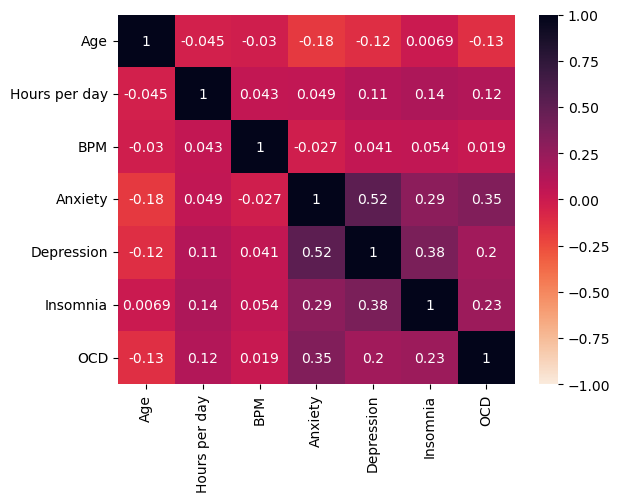

In [104]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

## some changes in the data

In [105]:
T_data = df.copy()

In [106]:
# delete all rows with at least one null value 
T_data.dropna ( axis = 'index' , how = 'any' , inplace = True )

In [107]:
#convert float into int
T_data['Age'] = T_data['Age'].astype(int)
T_data['Anxiety'] = T_data['Anxiety'].astype(int)
T_data['Depression'] = T_data['Depression'].astype(int)
T_data['Insomnia'] = T_data['Insomnia'].astype(int)
T_data['OCD'] = T_data['OCD'].astype(int)

In [108]:
#change columns name to be easeir
T_data.rename(columns = {'Frequency [Classical]':'Classical','Frequency [Country]':'Country',
                              'Frequency [EDM]':'EDM','Frequency [Folk]':'Folk',
                              'Frequency [Gospel]':'Gospel','Frequency [Hip hop]':'Hip-hop','Frequency [Jazz]':'Jazz','Frequency [K pop]':'K-pop',
                     'Frequency [Latin]':'Latin','Frequency [Lofi]':'Lofi','Frequency [Metal]':'Metal',
                     'Frequency [Pop]':'Pop','Frequency [R&B]':'R&B','Frequency [Rap]':'Rap',
                     'Frequency [Rock]':'Rock','Frequency [Video game music]':'Video-game-music','Music effects':'effects'}, inplace = True)

In [109]:
T_data.head().T

,2,3,4,5,6
Timestamp,8/27/2022 21:28:18,8/27/2022 21:40:40,8/27/2022 21:54:47,8/27/2022 21:56:50,8/27/2022 22:00:29
Age,18,61,18,18,18
Primary streaming service,Spotify,YouTube Music,Spotify,Spotify,YouTube Music
Hours per day,4.0,2.5,4.0,5.0,3.0
While working,No,Yes,Yes,Yes,Yes
Instrumentalist,No,No,No,Yes,Yes
Composer,No,Yes,No,Yes,No
Fav genre,Video game music,Jazz,R&B,Jazz,Video game music
Exploratory,No,Yes,Yes,Yes,Yes
Foreign languages,Yes,Yes,No,Yes,Yes


In [110]:
T_data.shape

(616, 33)

In [111]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  616 non-null    object 
 1   Age                        616 non-null    int64  
 2   Primary streaming service  616 non-null    object 
 3   Hours per day              616 non-null    float64
 4   While working              616 non-null    object 
 5   Instrumentalist            616 non-null    object 
 6   Composer                   616 non-null    object 
 7   Fav genre                  616 non-null    object 
 8   Exploratory                616 non-null    object 
 9   Foreign languages          616 non-null    object 
 10  BPM                        616 non-null    float64
 11  Classical                  616 non-null    object 
 12  Country                    616 non-null    object 
 13  EDM                        616 non-null    object 

In [112]:
T_data.isnull().sum()

Timestamp                    0
Age                          0
Primary streaming service    0
Hours per day                0
While working                0
Instrumentalist              0
Composer                     0
Fav genre                    0
Exploratory                  0
Foreign languages            0
BPM                          0
Classical                    0
Country                      0
EDM                          0
Folk                         0
Gospel                       0
Hip-hop                      0
Jazz                         0
K-pop                        0
Latin                        0
Lofi                         0
Metal                        0
Pop                          0
R&B                          0
Rap                          0
Rock                         0
Video-game-music             0
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
effects                      0
Permissi

<Axes: xlabel='effects'>

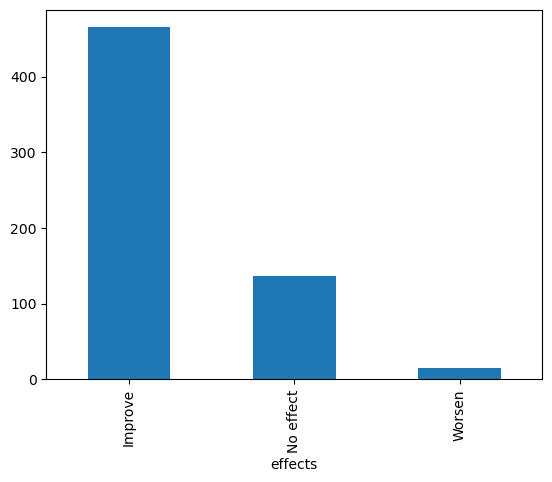

In [113]:
T_data.value_counts(T_data["effects"]).plot(kind="bar")

## Task2

In [114]:
#to see if there is still null value
for value in T_data.columns:
    print(value,":", sum(T_data[value] == '?'))

Timestamp : 0
Age : 0
Primary streaming service : 0
Hours per day : 0
While working : 0
Instrumentalist : 0
Composer : 0
Fav genre : 0
Exploratory : 0
Foreign languages : 0
BPM : 0
Classical : 0
Country : 0
EDM : 0
Folk : 0
Gospel : 0
Hip-hop : 0
Jazz : 0
K-pop : 0
Latin : 0
Lofi : 0
Metal : 0
Pop : 0
R&B : 0
Rap : 0
Rock : 0
Video-game-music : 0
Anxiety : 0
Depression : 0
Insomnia : 0
OCD : 0
effects : 0
Permissions : 0


In [115]:
#split the data
x=T_data.drop(['effects'],axis=1)
y=T_data.effects

In [116]:
x.head().T

,2,3,4,5,6
Timestamp,8/27/2022 21:28:18,8/27/2022 21:40:40,8/27/2022 21:54:47,8/27/2022 21:56:50,8/27/2022 22:00:29
Age,18,61,18,18,18
Primary streaming service,Spotify,YouTube Music,Spotify,Spotify,YouTube Music
Hours per day,4.0,2.5,4.0,5.0,3.0
While working,No,Yes,Yes,Yes,Yes
Instrumentalist,No,No,No,Yes,Yes
Composer,No,Yes,No,Yes,No
Fav genre,Video game music,Jazz,R&B,Jazz,Video game music
Exploratory,No,Yes,Yes,Yes,Yes
Foreign languages,Yes,Yes,No,Yes,Yes


In [117]:
y.head().T

2    No effect
3      Improve
4      Improve
5      Improve
6      Improve
Name: effects, dtype: object

In [118]:
#turn the values into numircal
x=pd.get_dummies(x)

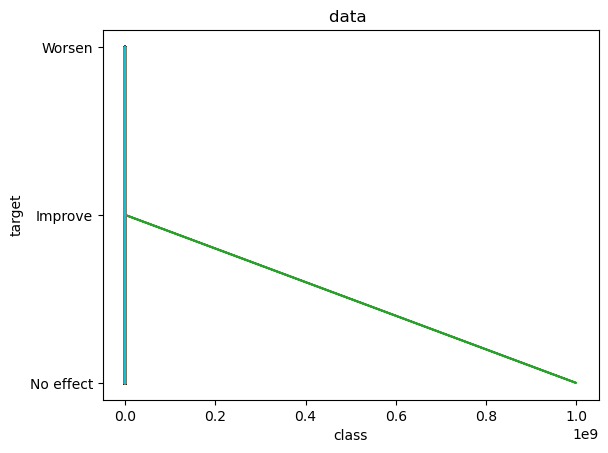

In [119]:
plt.plot(x, y)
plt.xlabel('class')
plt.ylabel('target')
plt.title('data ')
plt.show()

In [120]:
#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

In [121]:
X_train.shape

(412, 720)

In [122]:
X_test.shape

(204, 720)

In [123]:
Y_train.shape

(412,)

In [124]:
Y_test.shape

(204,)

In [125]:
#call the model and fit the data
classifier = CNB()
classifier.fit(X_train, Y_train)

ComplementNB()

In [126]:
Y_pred_train = classifier.predict(X_train)

In [127]:
train_Accuracy=ACC_SC(Y_train, Y_pred_train)
print("Train Accuracy: "+str(train_Accuracy))

Train Accuracy: 0.7402912621359223


In [128]:
Y_pred_test = classifier.predict(X_test)

In [129]:
test_Accuracy=ACC_SC(Y_test, Y_pred_test)
print("Test Accuracy: "+str(test_Accuracy))

Test Accuracy: 0.7892156862745098


**Evalution**

In [130]:
print("Train confusion_matrix")
confusion_matrix(Y_train, Y_pred_train)

Train confusion_matrix


array([[304,   0,   0],
       [ 94,   1,   0],
       [ 13,   0,   0]])

In [131]:
print("Test confusion_matrix")
confusion_matrix(Y_test, Y_pred_test)

Test confusion_matrix


array([[161,   0,   0],
       [ 41,   0,   0],
       [  2,   0,   0]])

In [132]:
print(f1_score(Y_test, Y_pred_test, average=None))
print(f1_score(Y_test, Y_pred_test, average='weighted'))
print(f1_score(Y_test, Y_pred_test, average='micro'))
print(f1_score(Y_test, Y_pred_test, average='macro'))

[0.88219178 0.         0.        ]
0.6962395917271018
0.7892156862745098
0.29406392694063926


In [133]:
print(f1_score(Y_train, Y_pred_train, average=None))
print(f1_score(Y_train, Y_pred_train, average='weighted'))
print(f1_score(Y_train, Y_pred_train, average='micro'))
print(f1_score(Y_train, Y_pred_train, average='macro'))

[0.85034965 0.02083333 0.        ]
0.632246263041166
0.7402912621359223
0.2903943278943279


In [134]:
print(precision_score(Y_test, Y_pred_test, average='macro',zero_division=1))
print(precision_score(Y_test, Y_pred_test, average='micro'))
print(precision_score(Y_test, Y_pred_test, average='weighted',zero_division=1))
print(precision_score(Y_test, Y_pred_test, average=None,zero_division=1))

0.9297385620915032
0.7892156862745098
0.8336457131872357
[0.78921569 1.         1.        ]


In [135]:
print(precision_score(Y_train, Y_pred_train, average='macro',zero_division=1))
print(precision_score(Y_train, Y_pred_train, average='micro'))
print(precision_score(Y_train, Y_pred_train, average='weighted',zero_division=1))
print(precision_score(Y_train, Y_pred_train, average=None,zero_division=1))

0.9132197891321979
0.7402912621359223
0.8079039992440885
[0.73965937 1.         1.        ]


In [136]:
print(recall_score(Y_test, Y_pred_test, average='macro',zero_division=1))
print(recall_score(Y_test, Y_pred_test, average='micro'))
print(recall_score(Y_test, Y_pred_test, average='weighted',zero_division=1))
print(recall_score(Y_test, Y_pred_test, average=None,zero_division=1))

0.3333333333333333
0.7892156862745098
0.7892156862745098
[1. 0. 0.]


In [137]:
print(recall_score(Y_train, Y_pred_train, average='macro',zero_division=1))
print(recall_score(Y_train, Y_pred_train, average='micro'))
print(recall_score(Y_train, Y_pred_train, average='weighted',zero_division=1))
print(recall_score(Y_train, Y_pred_train, average=None,zero_division=1))

0.3368421052631579
0.7402912621359223
0.7402912621359223
[1.         0.01052632 0.        ]


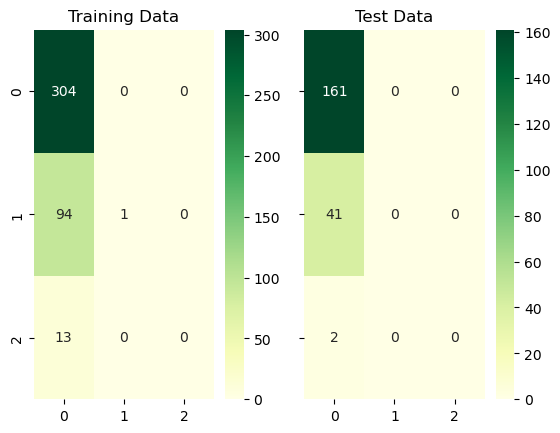

In [138]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, Y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test, Y_pred_test)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [139]:
scores = cross_val_score(classifier, x, y, cv=5)
print("K-fold Cross Validation Scores are: ", scores)  
print("Mean Cross Validation score is: ", scores.mean())

K-fold Cross Validation Scores are:  [0.75       0.75609756 0.75609756 0.6504065  0.75609756]
Mean Cross Validation score is:  0.733739837398374


## Task3

In [140]:
data_improving = T_data.copy()

In [141]:
#drop columen
data_improving.drop(columns=["Timestamp", "Primary streaming service",'Permissions'], inplace=True)

In [142]:
x1=data_improving.drop(['effects'],axis=1)
y1=data_improving.effects

In [143]:
x=pd.get_dummies(x)

In [144]:
train1, test1, train2, test2 = train_test_split(x, y, test_size = 0.33, random_state = 5)

In [145]:
clf = CNB()
clf.fit(train1, train2)

ComplementNB()

In [146]:
Y_pred_tr = clf.predict(train1)

In [147]:
train_Accuracy=ACC_SC(train2, Y_pred_tr)
print("Train Accuracy: "+str(train_Accuracy))

Train Accuracy: 0.7402912621359223


In [148]:
Y_pred_te = clf.predict(test1)

In [149]:
test_Accuracy=ACC_SC(test2, Y_pred_te)
print("Test Accuracy: "+str(test_Accuracy))

Test Accuracy: 0.7892156862745098


In [150]:
clf.class_log_prior_

array([-0.30399565, -1.46714646, -3.45607399])

In [151]:
((clf.feature_log_prob_.shape))

(3, 720)

In [152]:
params = {'alpha': [1.0,0.1,0.01,7.0,10.0],
          'fit_prior': [True],
          'norm': [True],
          'class_prior': [None, ]
         }

In [153]:
complement_nb_grid = GridSearchCV(CNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(train1,train2)
print('Best Accuracy Through Grid Search : {:.2f}'.format(complement_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(complement_nb_grid.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Accuracy Through Grid Search : 0.74
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True, 'norm': True}



In [154]:
Y_preds = complement_nb_grid.best_estimator_.predict(test1)
Y_preds_train = complement_nb_grid.best_estimator_.predict(train1)
print("Test Accuracy Score : "+str(ACC_SC(test2, Y_preds)))
print("Train Accuracy Score : "+str(ACC_SC(train2, Y_preds_train)))
print("\nClassification Report :")
print(CLA_RE(test2, Y_preds,zero_division=1))

Test Accuracy Score : 0.7892156862745098
Train Accuracy Score : 0.7427184466019418

Classification Report :
              precision    recall  f1-score   support

     Improve       0.79      1.00      0.88       161
   No effect       1.00      0.00      0.00        41
      Worsen       1.00      0.00      0.00         2

    accuracy                           0.79       204
   macro avg       0.93      0.33      0.29       204
weighted avg       0.83      0.79      0.70       204



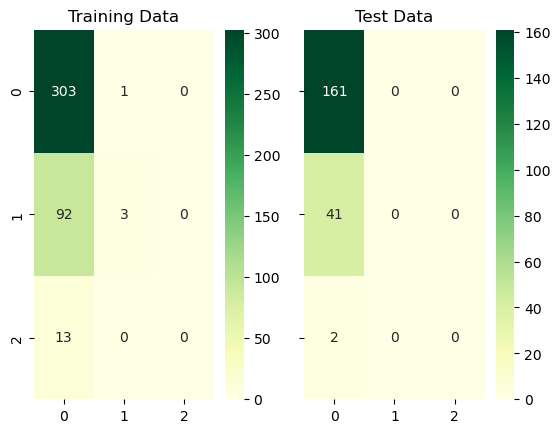

In [155]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(train2, Y_preds_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test2, Y_preds)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

## Task4

In [156]:
mlp = MLPClassifier(hidden_layer_sizes=(90,150,90), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(train1,train2)

MLPClassifier(hidden_layer_sizes=(90, 150, 90), max_iter=300, random_state=1)

In [157]:
predict_train4 = mlp.predict(train1)
predict_test4 = mlp.predict(test1)

In [158]:
train_Accuracy4=ACC_SC(train2, predict_train4)
print("Train Accuracy: "+str(train_Accuracy))

Train Accuracy: 0.7402912621359223


In [159]:
test_Accuracy4=ACC_SC(test2, predict_test4)
print("Test Accuracy: "+str(test_Accuracy))

Test Accuracy: 0.7892156862745098


In [160]:
print(f1_score(test2, predict_test4, average=None))
print(f1_score(test2, predict_test4, average='weighted'))
print(f1_score(test2, predict_test4, average='micro'))
print(f1_score(test2, predict_test4, average='macro'))

[0.84419263 0.         0.        ]
0.6662500694328722
0.7303921568627451
0.2813975448536355


In [161]:
print(f1_score(train2, predict_train4, average=None))
print(f1_score(train2, predict_train4, average='weighted'))
print(f1_score(train2, predict_train4, average='micro'))
print(f1_score(train2, predict_train4, average='macro'))

[0.83599419 0.18032787 0.        ]
0.6584305404474535
0.7257281553398058
0.33877402111240656


In [162]:
print(precision_score(test2, predict_test4, average='macro',zero_division=1))
print(precision_score(test2, predict_test4, average='micro'))
print(precision_score(test2, predict_test4, average='weighted',zero_division=1))
print(precision_score(test2, predict_test4, average=None,zero_division=1))

0.5920138888888888
0.7303921568627451
0.6222681781045751
[0.77604167 0.         1.        ]


In [163]:
print(precision_score(train2, predict_train4, average='macro',zero_division=1))
print(precision_score(train2, predict_train4, average='micro'))
print(precision_score(train2, predict_train4, average='weighted',zero_division=1))
print(precision_score(train2, predict_train4, average=None,zero_division=1))

0.7184864518197852
0.7257281553398058
0.6774550871638251
[0.74805195 0.40740741 1.        ]


In [164]:
print(recall_score(test2,predict_test4, average='macro',zero_division=1))
print(recall_score(test2,predict_test4, average='micro'))
print(recall_score(test2,predict_test4, average='weighted',zero_division=1))
print(recall_score(test2,predict_test4, average=None,zero_division=1))

0.3084886128364389
0.7303921568627451
0.7303921568627451
[0.92546584 0.         0.        ]


In [165]:
print(recall_score(train2, predict_train4, average='macro',zero_division=1))
print(recall_score(train2, predict_train4, average='micro'))
print(recall_score(train2, predict_train4, average='weighted',zero_division=1))
print(recall_score(train2, predict_train4, average=None,zero_division=1))

0.3543859649122807
0.7257281553398058
0.7257281553398058
[0.94736842 0.11578947 0.        ]


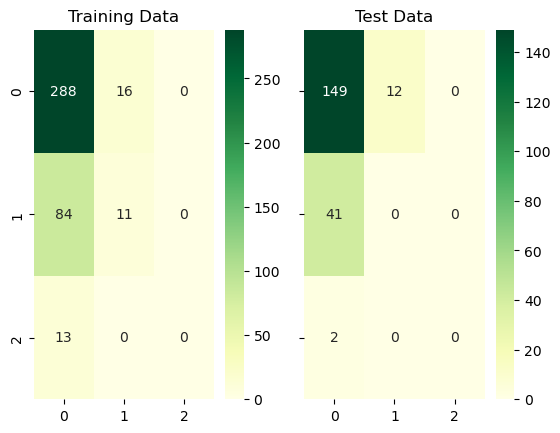

In [166]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(train2, predict_train4)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test2,predict_test4)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [167]:
scores = cross_val_score(mlp, x, y, cv=2)
print("K-fold Cross Validation Scores are: ", scores)  
print("Mean Cross Validation score is: ", scores.mean())  

K-fold Cross Validation Scores are:  [0.75974026 0.71103896]
Mean Cross Validation score is:  0.7353896103896104
